<a href="https://colab.research.google.com/github/AlejandroxConti/PES-UTN-FRA/blob/main/Alejandro_Conti_Tp1_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Práctico Nº 1

Objetivos:
* Aplicar conceptos de procesamiento de señales en python, como convolución.
* Familiarizarse con el entorno de desarrollo de python notebooks

## Ejercicios
1- Encontrar la función de transferencia del moving average. (Para esto deben definir un algoritmo de moving average y extraer su firma/transferencia).

2- Inyectar al moving average una cuadrada de amplitud 1 y frecuencia 2KHz y una triangular de amplitud 1 y frecuencia 1KHz. Analizar los resultados.

3- Realizar un algoritmo de convolución en float y en punto fijo (por ejemplo usando 'fixedpoint'), comparar tiempos y error a la salida. (Compararlo con np.convolve). Sacar conclusiones sobre los resultados.
Medir tiempos de computo con el método: timeit de la lib timeit de la siguiente forma:

In [ ]:
%pylab inline
import timeit
import time
import numpy as np

t = np.arange(0, 1024/20000, 1/20000)
s1= np.sin(2*np.pi*1000*t)+1
s2 = np.sin(2*np.pi*1200*t)

# METODO 1 de medición de tiempos

# Este wrapper empaqueta funciones para que el timeit pueda medir solo eso
def wrapper(func, *args):
    def wrapped():
        return func(*args)
    return wrapped

conv = wrapper(np.convolve, s1, s2)
print (timeit.timeit(conv, number=1))

# METODO 2 de medición de tiempos
start = time.time()
conv_r = np.convolve(s1,s2)
end = time.time()
print (end-start)



Populating the interactive namespace from numpy and matplotlib
0.00026026000000456406
0.0003643035888671875


La diferencia en la medición depende de la carga de la CPU y que el primer método mide solamente la función pedida. Usar uno de los 2 para realizar la medición, como la medición es comparativa, solo importa usar el mismo método para todo, los valores absolutos no importan.

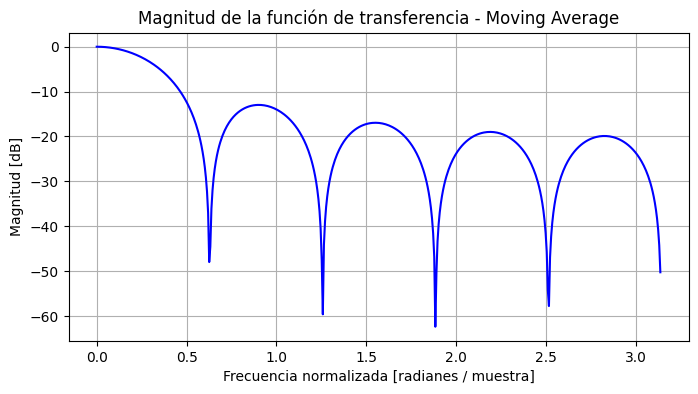

Coeficientes del numerador (b): [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]


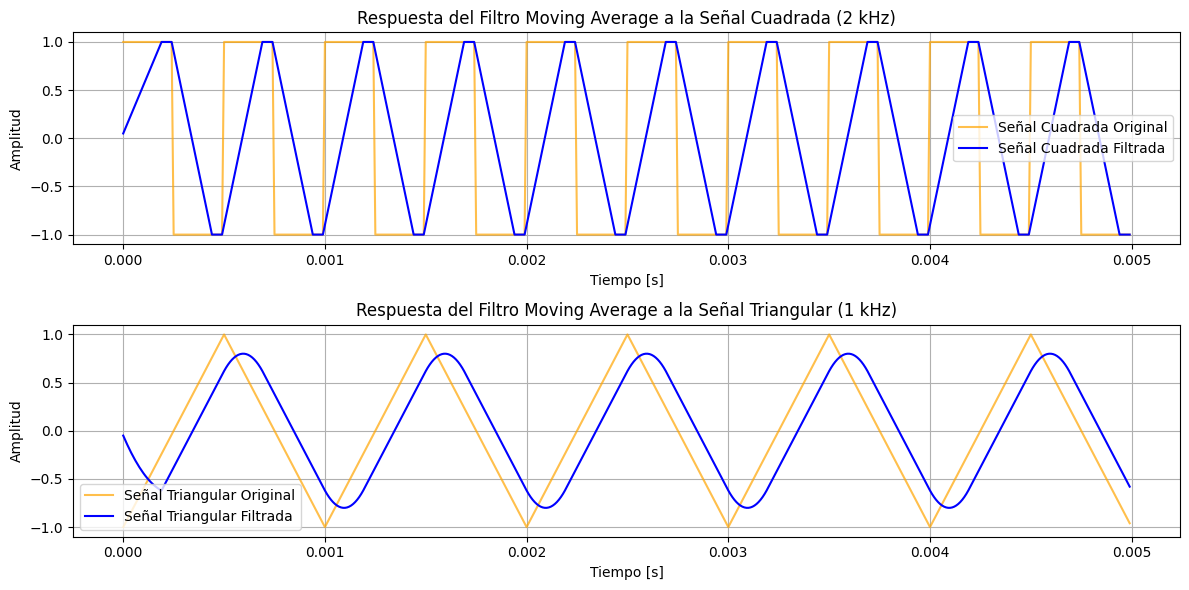

Tiempo de convolución en punto flotante: 0.000185 segundos
Tiempo de convolución en punto fijo: 6.942247 segundos
Tiempo de np.convolve: 0.000213 segundos
Error promedio entre punto flotante y punto fijo: 0.004696
Error máximo entre punto flotante y punto fijo: 0.016460


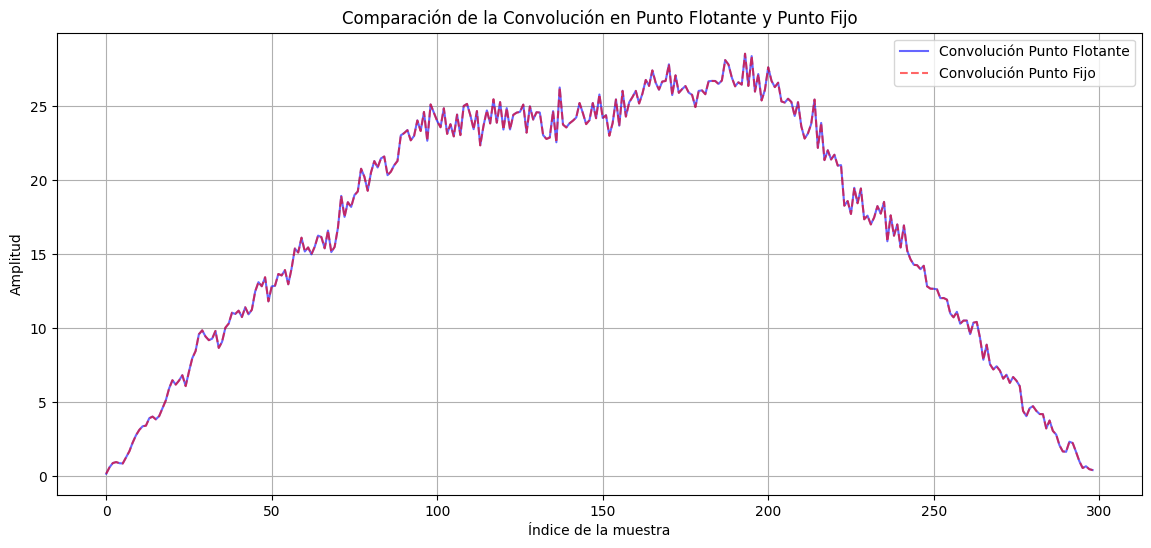

Populating the interactive namespace from numpy and matplotlib
Tiempo de cómputo con timeit (Método 1): 0.00042649699997809876 segundos
Tiempo de cómputo usando time.time (Método 2): 0.0005528926849365234 segundos


In [1]:
#1- Encontrar la función de transferencia del moving average. (Para esto deben definir un algoritmo de moving average y extraer su firma/transferencia).

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

def moving_average_transfer_function(N):
    # Coeficientes de la función de transferencia en el dominio z
    b = np.ones(N) / N  # Numerador (coeficientes de la media móvil)
    a = [1]  # Denominador (simple porque es FIR, sin realimentación)

    # Obtener la frecuencia y la respuesta
    w, h = signal.freqz(b, a)

    return w, h, b

# Parámetros del filtro
N = 10  # Número de muestras del moving average

# Obtener la función de transferencia
frecuencias, respuesta, coeficientes = moving_average_transfer_function(N)

# Mostrar la magnitud de la respuesta en dB
plt.figure(figsize=(8, 4))
plt.plot(frecuencias, 20 * np.log10(abs(respuesta)), 'b')
plt.title('Magnitud de la función de transferencia - Moving Average')
plt.xlabel('Frecuencia normalizada [radianes / muestra]')
plt.ylabel('Magnitud [dB]')
plt.grid()
plt.show()

# Mostrar los coeficientes del filtro (numerador)
print("Coeficientes del numerador (b):", coeficientes)


#2- Inyectar al moving average una cuadrada de amplitud 1 y frecuencia 2KHz y una triangular de amplitud 1 y frecuencia 1KHz.
#   Analizar los resultados.
"""Análisis de los Resultados de ambas señales inyectadas

1. Señal Cuadrada (2 kHz):
El filtro Moving Average suaviza la señal cuadrada al reducir las transiciones abruptas
entre los niveles altos y bajos.
El filtro Moving Average tiene un efecto idem a filtro pasa bajo, las componentes de alta
frecuencia presentes en la señal cuadrada se atenúan. Se parece a una señal cuasisenoidal.

2. Señal Triangular (La señal triangular también se suaviza por el filtro, pero debido a que su frecuencia es
menor (1 kHz) en comparación con la señal cuadrada, la distorsión es menos pronunciada.
El efecto del filtro Moving Average será de menor grado en esta señal, pero aún se observa
una ligera atenuación en las transiciones.

Este comportamiento es consistente con el hecho de que un filtro Moving Average actúa
como un filtro pasa bajo que tiende a reducir las altas frecuencias presentes en una
señal."""

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

def moving_average_filter(signal_input, N):
    """Aplicar filtro Moving Average de longitud N a una señal de entrada."""
    b = np.ones(N) / N  # Coeficientes del filtro (numerador)
    a = [1]             # Coeficientes del denominador
    filtered_signal = signal.lfilter(b, a, signal_input)
    return filtered_signal

# Parámetros de la señal
fs = 100000  # Frecuencia de muestreo de 100 kHz para evitar aliasing
t = np.arange(0, 5e-3, 1/fs)  # Vector de tiempo de 0 a 5 ms (suficiente para observar ambas señales)

# Generar la señal cuadrada de 2 kHz y amplitud 1
square_signal = signal.square(2 * np.pi * 2000 * t)  # Frecuencia de 2 kHz

# Generar la señal triangular de 1 kHz y amplitud 1
triangular_signal = signal.sawtooth(2 * np.pi * 1000 * t, width=0.5)  # Frecuencia de 1 kHz, ancho 0.5 para hacerla triangular

# Parámetros del filtro Moving Average
N = 20  # Número de muestras para moving average

# Filtrar ambas señales
filtered_square_signal = moving_average_filter(square_signal, N)
filtered_triangular_signal = moving_average_filter(triangular_signal, N)

# Ver la señal cuadrada original y filtrada
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, square_signal, label='Señal Cuadrada Original', color='orange', alpha=0.7)
plt.plot(t, filtered_square_signal, label='Señal Cuadrada Filtrada', color='blue')
plt.title('Respuesta del Filtro Moving Average a la Señal Cuadrada (2 kHz)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)

# Ver la señal triangular original y filtrada
plt.subplot(2, 1, 2)
plt.plot(t, triangular_signal, label='Señal Triangular Original', color='orange', alpha=0.7)
plt.plot(t, filtered_triangular_signal, label='Señal Triangular Filtrada', color='blue')
plt.title('Respuesta del Filtro Moving Average a la Señal Triangular (1 kHz)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


#3- Realizar un algoritmo de convolución en float y en punto fijo (por ejemplo usando 'fixedpoint'),
#   comparar tiempos y error a la salida. (Compararlo con np.convolve).
#   Sacar conclusiones sobre los resultados.
"""Conclusiones
Tiempo de Ejecución:

El algoritmo en punto fijo es más lento que el de punto flotante debido al manejo de objetos FixedPoint
en Python y la falta de optimización.
En cambio "np.convolve" es más rápido ya que está optimizado.
.
Error de Cálculo
:
Habrá un error entre la implementación en punto fijo y en punto flotante, ya que la precisión en punto fijo es limitada
(solo 8 bits fraccionarios)

Se espera un error mayor en comparación con los cálculos de punto flotante.
Este código te permitirá comparar directamente la velocidad y precisión de ambos métodos de convolución.
Con punto flotante suele ser más eficiente y preciso, mientras que con punto fijo es más adecuado para sistemas embebidos o
hardware con recursos más limitados.
"""
# Instalar la librería fixedpoint
!pip install fixedpoint

# Importar las librerías
import numpy as np
from fixedpoint import FixedPoint
import time
import matplotlib.pyplot as plt

def float_convolution(x, h):
    """Convolución en punto flotante."""
    return np.convolve(x, h)

def fixed_point_convolution(x, h, word_length=16, frac_length=8):
    """Convolución en punto fijo usando la librería fixedpoint."""
    x_fp = [FixedPoint(val, signed=True, m=word_length, n=frac_length) for val in x]
    h_fp = [FixedPoint(val, signed=True, m=word_length, n=frac_length) for val in h]

    y_length = len(x) + len(h) - 1
    y_fp = [FixedPoint(0, signed=True, m=word_length, n=frac_length) for _ in range(y_length)]

    for n in range(y_length):
        acc = FixedPoint(0, signed=True, m=word_length, n=frac_length)
        for k in range(len(h_fp)):
            if 0 <= n - k < len(x_fp):
                acc += x_fp[n - k] * h_fp[k]
        y_fp[n] = acc

    return np.array([float(val) for val in y_fp])

# Definir señales de prueba
np.random.seed(0)  # Fijar semilla para reproducibilidad
x = np.random.rand(200)  # Señal de entrada de longitud 100
h = np.random.rand(100)   # Señal del filtro de longitud 50

# Calcular la convolución en punto flotante
start_time = time.time()
y_float = float_convolution(x, h)
float_time = time.time() - start_time
print(f"Tiempo de convolución en punto flotante: {float_time:.6f} segundos")

# Calcular la convolución en punto fijo
start_time = time.time()
y_fixed = fixed_point_convolution(x, h, word_length=16, frac_length=8)
fixed_time = time.time() - start_time
print(f"Tiempo de convolución en punto fijo: {fixed_time:.6f} segundos")

# Calcular la convolución utilizando np.convolve para verificar
start_time = time.time()
y_np_convolve = np.convolve(x, h)
np_time = time.time() - start_time
print(f"Tiempo de np.convolve: {np_time:.6f} segundos")

# Calcular el error entre la convolución en punto flotante y en punto fijo
error = np.abs(y_float - y_fixed)
mean_error = np.mean(error)
max_error = np.max(error)

print(f"Error promedio entre punto flotante y punto fijo: {mean_error:.6f}")
print(f"Error máximo entre punto flotante y punto fijo: {max_error:.6f}")

# Ver los resultados
plt.figure(figsize=(14, 6))
plt.plot(y_float, label='Convolución Punto Flotante', color='blue', alpha=0.6)
plt.plot(y_fixed, label='Convolución Punto Fijo', color='red', linestyle='dashed', alpha=0.6)
plt.title('Comparación de la Convolución en Punto Flotante y Punto Fijo')
plt.xlabel('Índice de la muestra')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

#*************************************************************************************************
#*************************************************************************************************
# Medir tiempos de computo con el método: timeit de la lib timeit

# Activa la opción para gráficos inline (requerida para mostrar gráficos en Colab)
%pylab inline

import timeit
import time
import numpy as np

# Definir la señal de prueba
t = np.arange(0, 1024/20000, 1/20000)
s1 = np.sin(2 * np.pi * 1000 * t) + 1  # Señal s1 con una frecuencia de 1000 Hz y desplazada en amplitud
s2 = np.sin(2 * np.pi * 1500 * t)      # Señal s2 con una frecuencia de 1500 Hz

# MÉTODO 1 de medición de tiempos usando timeit

# Wrapper para empaquetar la función que queremos medir
def wrapper(func, *args):
    def wrapped():
        return func(*args)
    return wrapped

# Empaquetar la función np.convolve con las señales s1 y s2
conv = wrapper(np.convolve, s1, s2)

# Medir el tiempo de cómputo usando timeit
print("Tiempo de cómputo con timeit (Método 1):", timeit.timeit(conv, number=1), "segundos")

# MÉTODO 2 de medición de tiempos usando time.time
start = time.time()
conv_result = np.convolve(s1, s2)
end = time.time()
print("Tiempo de cómputo usando time.time (Método 2):", end - start, "segundos")

